In [28]:
import censusdata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis using the American Census Data (ACS) collected by the American Community Survey
# Ongoing survey by the U.S. Census Bureau that provides up-to-date info on demographics,
# economics, housing, and social characteristics of the U.S. population annually.

# Unlice Decennial census (counts population every 10 years), the ACS provides frequent, detailed,
# and consistent data on how people live, helping governments and orgs with program administration
# and evaluation.



# ----------------------------
# 1. Define geographies, see county subdivisons
#    https://tigerweb.geo.census.gov/tigerwebmain/Files/tab20/tigerweb_tab20_cousub_2020_nj.html
# ----------------------------

# Washington Township, Warren County, NJ (county subdivision)
township_geo = censusdata.censusgeo([
    ('state', '34'),  # New Jersey
    ('county', '041'),  # Warren County FIPS Code
    ('county subdivision', '77300') # Washington township
])

borough_geo = censusdata.censusgeo([
    ('state', '34'),  # New Jersey
    ('county', '041'), # Warren County FIPS Code
    ('county subdivision', '77270') # Washingon borough
])

# ZIP 07882 (ZCTA)
zip_geo = censusdata.censusgeo([
    ('zip code tabulation area', '07882')
])

In [24]:
# ----------------------------
# 2. Choose variables
# ----------------------------
# B01001: Age by sex
# B19013: Median household income
# B17001: Poverty
variables = [
    'B01001_001E',  # Total population
    'B01001_002E',  # Male total
    'B01001_026E',  # Female total
    'B19013_001E',  # Median household income
    'B17001_002E'   # Below poverty line
]


In [25]:
# ----------------------------
# 3. Download ACS 5-year 2023
# ----------------------------
township_data = censusdata.download('acs5', 2023, township_geo, variables)
borough_data  = censusdata.download('acs5', 2023, borough_geo, variables)
zip_data      = censusdata.download('acs5', 2023, zip_geo, variables)


In [26]:
# Combine into dataframe
df = pd.concat([township_data, borough_data, zip_data])
df.index = ["Washington Twp (Warren)", "Washington Borough", "ZIP 07882"]

# Rename columns
df.columns = ["Total Pop", "Male Pop", "Female Pop", "Median HH Income", "Below Poverty"]

# Add % poverty
df["% Poverty"] = df["Below Poverty"] / df["Total Pop"] * 100

# Save to CSV
df.to_csv("washington_demo_summary.csv")
print(df)

                         Total Pop  Male Pop  Female Pop  Median HH Income  \
Washington Twp (Warren)       6597      3431        3166            131250   
Washington Borough            7287      3537        3750             79280   
ZIP 07882                    14918      7423        7495            100852   

                         Below Poverty  % Poverty  
Washington Twp (Warren)            346   5.244808  
Washington Borough                 839  11.513654  
ZIP 07882                         1225   8.211557  


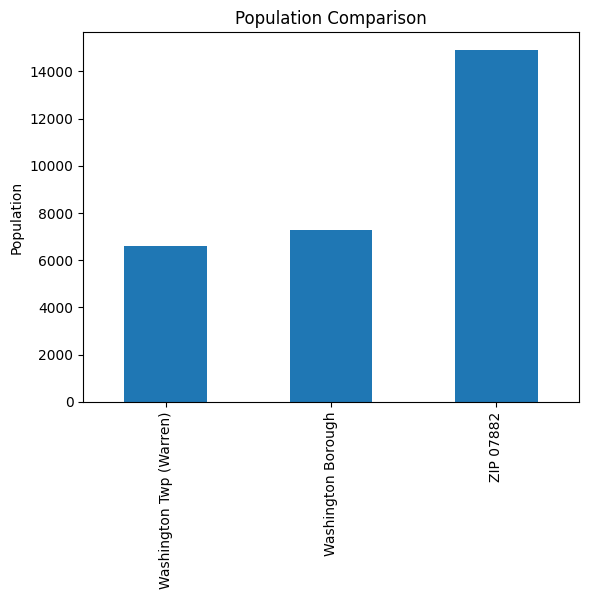

C:\Users\vmtam\AppData\Local\Temp\ipykernel_408\2650016071.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df["Median HH Income"][i], df["% Poverty"][i]))


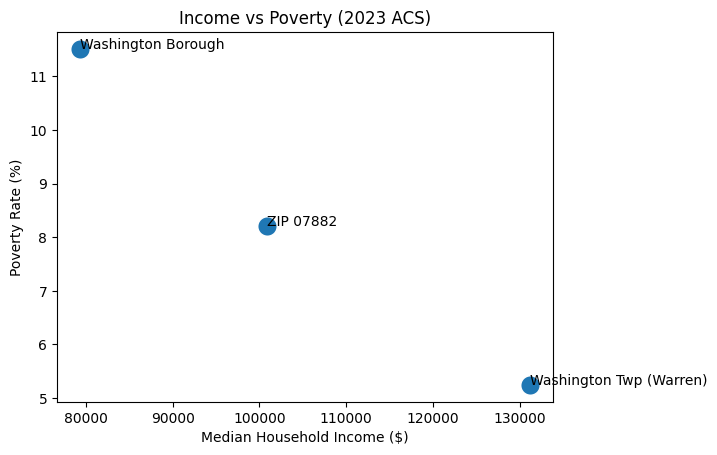

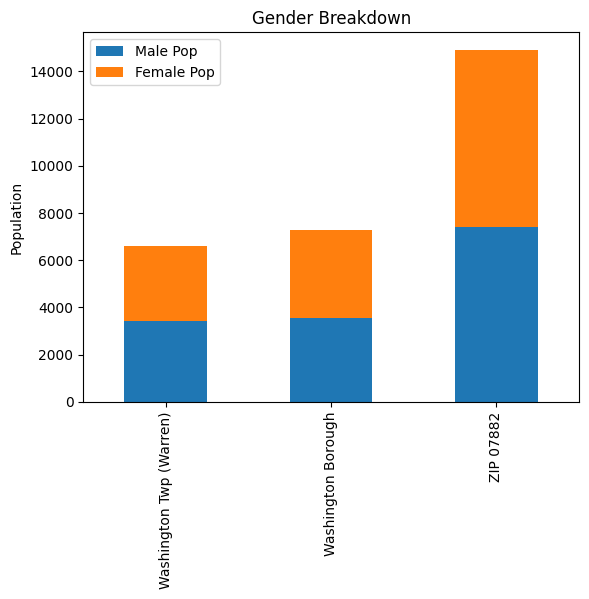

In [27]:
# ----------------------------
# 4. Visualizations
# ----------------------------
df["Total Pop"].plot(kind="bar", title="Population Comparison", ylabel="Population")
plt.show()

sns.scatterplot(data=df, x="Median HH Income", y="% Poverty", s=200)
for i, txt in enumerate(df.index):
    plt.annotate(txt, (df["Median HH Income"][i], df["% Poverty"][i]))
plt.title("Income vs Poverty (2023 ACS)")
plt.xlabel("Median Household Income ($)")
plt.ylabel("Poverty Rate (%)")
plt.show()

df[["Male Pop", "Female Pop"]].plot(kind="bar", stacked=True, title="Gender Breakdown")
plt.ylabel("Population")
plt.show()